In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
darwin = fetch_ucirepo(id=732) 
  
# data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 

original_X = X.copy()
original_y = y.copy()
# metadata 
print(darwin.metadata) 
  
# variable information 
print(darwin.variables) 

{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'ID': 132, 'type': 'NATIVE', 'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De St

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The DARWIN Dataset

We'll be working with the DARWIN dataset. The DARWIN dataset includes handwriting data of 174 participants. And the task is to classify and distinguish Alzheimer's disease patients from healthy people.

Let's have a look at the dataset.

In [198]:
darwin.variables

,name,role,type,demographic,description,units,missing_values
0,ID,Feature,Categorical,None,None,None,no
1,air_time1,Feature,Integer,None,None,None,no
2,disp_index1,Feature,Categorical,None,None,None,no
3,gmrt_in_air1,Feature,Continuous,None,None,None,no
4,gmrt_on_paper1,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
447,paper_time25,Feature,Integer,None,None,None,no
448,pressure_mean25,Feature,Continuous,None,None,None,no
449,pressure_var25,Feature,Continuous,None,None,None,no
450,total_time25,Feature,Integer,None,None,None,no


### What are these features?

Damn... 450 are a lot of features. But wait, isn't the dataset composed of handritten data? What kind of features are this? "gmrt_in_air1" and "paper_time25" are not attributes that I relate to that kind of data, for someone who innitialy though this might be a computer vision problem, some sort of MNIST 2.0, I am quite lost.

### v2
You might be a little surprised by this dataset, wasn t it supposed to be composed of handwritten data? Why are the features labeled air_time1 or pressure_var25? If you re like me, you might have presumed the data to be composed by, perhaps, images of handwritten text, and this notebook were to involve a computer vision solution to it. Nevertheless, these are the features on the dataset, and if we look a little closer to what the measurements mean, it makes perfect sense to be it like it is. Let s start by that then, let s have a closer look in what these features really mean

### Taking a closer look at the features

In [161]:
X.columns

Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'mean_gmrt25', 'mean_jerk_in_air25', 'mean_jerk_on_paper25',
       'mean_speed_in_air25', 'mean_speed_on_paper25', 'num_of_pendown25',
       'paper_time25', 'pressure_mean25', 'pressure_var25', 'total_time25'],
      dtype='object', length=450)

In [19]:
feature_names = X.columns.tolist()
for i in range(1, 25):
    print(feature_names[i])

air_time1
disp_index1
gmrt_in_air1
gmrt_on_paper1
max_x_extension1
max_y_extension1
mean_acc_in_air1
mean_acc_on_paper1
mean_gmrt1
mean_jerk_in_air1
mean_jerk_on_paper1
mean_speed_in_air1
mean_speed_on_paper1
num_of_pendown1
paper_time1
pressure_mean1
pressure_var1
total_time1
air_time2
disp_index2
gmrt_in_air2
gmrt_on_paper2
max_x_extension2
max_y_extension2


### What do they mean?
Two things stand out from the features. One, they seem measurements of a pen and paper, like accuracy of the pen on the paper (acc_on_paper), the mean speed of the pen on the paper (mean_speed_on_paper) and air (mean_speed_on_air), pressure of the pen on the paper (pressure_mean), and other alike. This can all be obtained using a digital tablet, so it would seem something similar were used to capture the data. 
The other thing that stands out is the numbers at the end of each feature, and how the feature names repeat air_time1, air_time2, gmrt_on_paper1, gmrt_on_paper2. We can identify 18 unique features for number 1. Let's quickly check if this pattern repeats.

In [20]:
feature_names = X.columns.tolist()[1:18+1]  # Grab the 18 features from task 1
feature_names = [feature[:-1] for feature in feature_names]  # Remove the last character from each feature name
feat_counter = 1   # Counter the number of features

for feature in feature_names:   # Iterate over the features
    for task in range(1, 25+1):  # Iterate over the tasks
        if f"{feature}{task}" not in X.columns: # Check if the feature exists for the task
            raise ValueError(f"Feature {feature} for task {task} not found")
    print(f"Feature {feat_counter}: {feature} for task [1..25]. Check") 
    feat_counter += 1

Feature 1: air_time for task [1..25]. Check
Feature 2: disp_index for task [1..25]. Check
Feature 3: gmrt_in_air for task [1..25]. Check
Feature 4: gmrt_on_paper for task [1..25]. Check
Feature 5: max_x_extension for task [1..25]. Check
Feature 6: max_y_extension for task [1..25]. Check
Feature 7: mean_acc_in_air for task [1..25]. Check
Feature 8: mean_acc_on_paper for task [1..25]. Check
Feature 9: mean_gmrt for task [1..25]. Check
Feature 10: mean_jerk_in_air for task [1..25]. Check
Feature 11: mean_jerk_on_paper for task [1..25]. Check
Feature 12: mean_speed_in_air for task [1..25]. Check
Feature 13: mean_speed_on_paper for task [1..25]. Check
Feature 14: num_of_pendown for task [1..25]. Check
Feature 15: paper_time for task [1..25]. Check
Feature 16: pressure_mean for task [1..25]. Check
Feature 17: pressure_var for task [1..25]. Check
Feature 18: total_time for task [1..25]. Check


It checks out. There are 25 tasks with 18 features each. This seems like good assumptions so far, now let's try to search in the web for some answers.

### The answers...
The article [Handwriting Task-Selection based on the Analysis of Patterns in Classification Results on Alzheimer Dataset](https://ceur-ws.org/Vol-3521/paper2.pdf) has a good description of how the data and experiments were set-up. The article tries to do the exact thing we're trying to do here, so reading it feels like cheating let's only read a few things about the dataset for better understanding. We were really close with our assumptions, participants were asked to perform 25 handwriting taks and from each task 18 features were extract using a digital table (WACOM Bamboo Folio). 

Extracted from the article "The extracted features are related to the time spent to complete the task (total time); such time were also divided in on-paper time and in-air time; the average speed, acceleration and jerk computed separately for on-paper movements and in-airmovements; mean and variance ofthe pressure; the Generalization of the Mean Relative Tremor (GMRT), which consists of the average of the sum of thedifferences between the i-th point and its d-th predecessor, firstly divided on-paper and in-air values, and the averagingthe previous values; the maximal extension about x and y axis; and finally the Dispersion Index which consists ofdividing the paper sheet in fixed-size boxes (e.g. 3x3) then counting how many boxes are covered by the handwritingtraits and successively dividing that number with the total amount of the boxes; in this way, the coverage ratio of thepaper sheet is computed."

A description for each task can be found in the article

## 2. Feature Selection

Let's start by taking a look at the target class distribution

### Target class balance

class
P    89
H    85
Name: count, dtype: int64

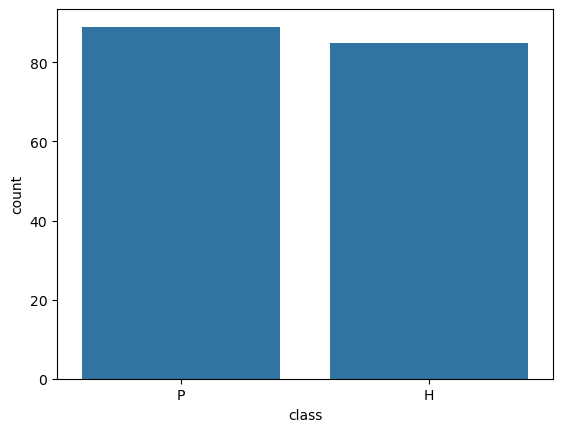

In [21]:
sns.countplot(y, x='class')
y['class'].value_counts()

It seems well balanced, 89 instances belong to the P class and 85 to H, whatever that means. Let's first begin by encoding these classes, before that we need to know what H and P means. From the article mentioned above the 'H' labels compose the 85 healthy instances of the set, 'P' labels the subjects that suffer from Alzheimer.

In [22]:
y.dtypes

class    object
dtype: object

Quickly change to integers

In [199]:
from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder()
#y.loc[:, 'class'] = le.fit_transform(y['class'])

y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)

/var/folders/_y/56tk0_8d5jb15bryj56qxsjc0000gn/T/ipykernel_1247/1866712584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)


In [150]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   174 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [151]:
X.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


### High variance in many features

and what is going on in disp_indeX?

In [200]:
X.drop(columns=['ID'], inplace=True)

/var/folders/_y/56tk0_8d5jb15bryj56qxsjc0000gn/T/ipykernel_1247/1746809000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['ID'], inplace=True)


In [27]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X))
#X.describe()

### Correlation

In [201]:
# Ensure numeric data types
X = X.apply(pd.to_numeric, errors='coerce')
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

y = pd.to_numeric(y, errors='coerce')

# Recalculate correlation
cor = X.corrwith(y)
cor = cor.abs().sort_values(ascending=False)
cor

gmrt_in_air7           0.462846
mean_gmrt7             0.457210
disp_index23           0.449566
mean_speed_in_air7     0.447509
paper_time9            0.445284
                         ...   
max_y_extension12      0.003908
mean_speed_in_air13    0.003197
total_time7            0.001822
num_of_pendown18       0.001013
pressure_var7          0.000542
Length: 450, dtype: float64

In [202]:
measurements = [
    "air_time",
    "disp_index",
    "gmrt_in_air",
    "gmrt_on_paper",
    "max_x_extension",
    "max_y_extension",
    "mean_acc_in_air",
    "mean_acc_on_paper",
    "mean_gmrt",
    "mean_jerk_in_air",
    "mean_jerk_on_paper",
    "mean_speed_in_air",
    "mean_speed_on_paper",
    "num_of_pendown",
    "paper_time",
    "pressure_mean",
    "pressure_var",
    "total_time"
    ]

result = {}
for measurement in measurements:
    labels = X.filter(regex=measurement).columns.tolist()
    task = []
    i = 1
    for label in labels:
        task.append([i, cor[label]])
        i += 1
    result[measurement] = task

result

{'air_time': [[1, 0.06835501216048959],
  [2, 0.3541123352539342],
  [3, 0.34843557427741195],
  [4, 0.19675316539406226],
  [5, 0.31142715772660506],
  [6, 0.3750450969997752],
  [7, 0.036067675943303464],
  [8, 0.298809042726923],
  [9, 0.3486989640496056],
  [10, 0.3376282002310972],
  [11, 0.038113757937492755],
  [12, 0.04237813523634323],
  [13, 0.38080413403980923],
  [14, 0.03542610039279598],
  [15, 0.38273691465843074],
  [16, 0.440470948172536],
  [17, 0.1969670460784649],
  [18, 0.07742982412420801],
  [19, 0.23334359729837345],
  [20, 0.20360261698607154],
  [21, 0.3585604663962532],
  [22, 0.10393565834357886],
  [23, 0.05341674607152756],
  [24, 0.35031581200090117],
  [25, 0.09933107830563391]],
 'disp_index': [[1, 0.22204966799316317],
  [2, 0.3651887979618382],
  [3, 0.2500458007242317],
  [4, 0.1488173750578357],
  [5, 0.13194859649258547],
  [6, 0.3272067088962292],
  [7, 0.36212101923290824],
  [8, 0.3255291553807612],
  [9, 0.3532575469939394],
  [10, 0.3344725916

(244, 7)

## Plotting the correlation of features

In [ ]:
sns.set(style="whitegrid")

result2 = {}
for measurement in measurements:
    labels = X.filter(regex=measurement).columns.tolist()
    task = []
    task2 = list(range(1,26))
    for label in labels:
        task.append(cor[label])
    result2[measurement] = [task2, task]

result2

for item in result2.keys():
    plt.figure()
    ax = sns.barplot(x=result2[item][0], y=result2[item][1])
    ax.set_title(item)
    ax.set_ylim(0,0.5)

In [203]:
cor_per_feature = []

for measurement in measurements:
    sum_of_cor_per_feature = 0
    for label in X.filter(regex=measurement).columns.tolist():
        sum_of_cor_per_feature += cor[label]

    cor_per_feature.append((measurement, sum_of_cor_per_feature))

for feature, correlation in sorted(cor_per_feature, key=lambda x: x[1], reverse=True):
    print(f"Measurement {feature}: {correlation}")


Measurement paper_time: 7.645639050254869
Measurement pressure_mean: 7.616254891150815
Measurement mean_speed_on_paper: 6.505405614383124
Measurement disp_index: 6.322023890972698
Measurement total_time: 6.161515963485619
Measurement gmrt_on_paper: 6.034560097465413
Measurement air_time: 5.672165060805628
Measurement num_of_pendown: 5.63135398068658
Measurement mean_gmrt: 5.618438942436855
Measurement gmrt_in_air: 4.994039118056735
Measurement mean_jerk_on_paper: 4.9005013985702615
Measurement mean_speed_in_air: 4.5554553537841125
Measurement mean_acc_on_paper: 3.883680946480825
Measurement max_x_extension: 3.531465123393996
Measurement max_y_extension: 3.363421077277323
Measurement pressure_var: 3.2441612167737666
Measurement mean_acc_in_air: 3.2195428138728
Measurement mean_jerk_in_air: 3.2153147973546226


In [204]:
cor_per_task = []
sum_of_cor_per_task = 0

for i in range(1, 26):
    sum_of_cor_per_task = 0
    for measurement in measurements:
        label = X.filter(regex=measurement).columns.tolist()[i-1]
        sum_of_cor_per_task += cor[label]
    
    cor_per_task.append((i, sum_of_cor_per_task))
    #print(f"Task: {i}, Sum of correlation: {sum_of_cor_per_task}")

for task, correlation in sorted(cor_per_task, key=lambda x: x[1], reverse=True):
    print(f"Task {task}: {correlation}")

Task 17: 5.2202220579509495
Task 7: 4.853159063058659
Task 2: 4.7084419308537955
Task 25: 4.3972493342928685
Task 9: 4.3971787780096445
Task 23: 4.37419986838077
Task 3: 4.094058334656872
Task 8: 4.052360042738162
Task 15: 4.02181233250178
Task 21: 3.9001562384349593
Task 22: 3.7276373394306384
Task 10: 3.7215919983059074
Task 6: 3.7147964636421174
Task 14: 3.5835104395290602
Task 13: 3.350001518941361
Task 20: 3.3225528219152776
Task 19: 3.284398777803738
Task 5: 3.252437205214439
Task 11: 3.188598109401082
Task 24: 3.090330436653611
Task 4: 3.0833007015325813
Task 16: 2.9096006838188475
Task 1: 2.7240105135161876
Task 12: 2.7112011769830797
Task 18: 2.432133169639654


## Bulding a Decision Tree Classifier Model

Bulding a decision tree to find the most important features

In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8285714285714286

Plot the tree and read the graph

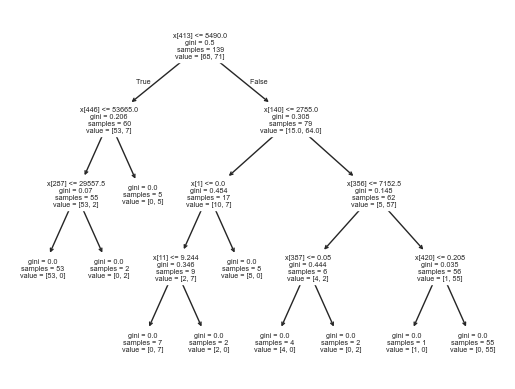

In [218]:
tree.plot_tree(clf)
plt.savefig('out.pdf')

In [145]:
X.columns[[413, 433, 403, 154]]

Index(['total_time23', 'disp_index25', 'mean_acc_on_paper23',
       'mean_jerk_on_paper9'],
      dtype='object')

In [17]:
X = original_X.copy()
y = original_y.copy()
X = X.drop(columns=['ID'])
y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)
feature_names = X.columns.tolist()

print(X.shape)
print(y.shape)

def get_root_node(dt, feature_names):
    feature_idx = dt.tree_.feature[0]
    return feature_names[feature_idx]


n_repeats = 20
root_nodes = []

# variando o seed do holdout, geramos conjuntos de treino e teste um pouco diferentes a cada iteração
for split_random_state in range(0, n_repeats):
  # Holdout com 20% de dados de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=split_random_state)

  # Treinamento da árvore usando os dados de treino
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)

  # Obtemos o atributo usado na raiz e o salvamos na lista
  root_node = get_root_node(dt, feature_names)
  root_nodes.append(root_node)

root_nodes

(174, 450)
(174, 1)


['total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23',
 'total_time23']

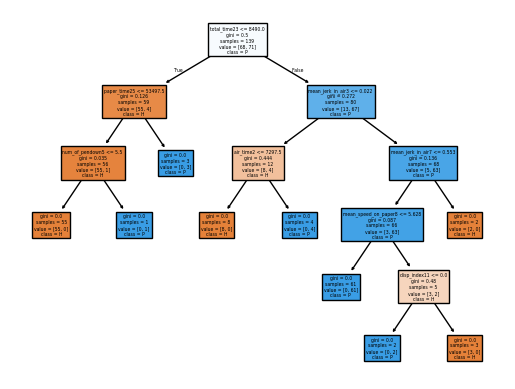

In [22]:
tree.plot_tree(clf, feature_names=feature_names, class_names=['H', 'P'], filled=True)
plt.savefig('out.pdf')

## Random Forest

# Missing Data

In [30]:
total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
air_time1,0,0.0
num_of_pendown19,0,0.0
disp_index18,0,0.0
air_time18,0,0.0
total_time17,0,0.0


# No missing data

In [3]:
# fetch dataset 
darwin = fetch_ucirepo(id=732) 
  
# data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 

X = X.drop(columns=['ID'])
y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)
feature_names = X.columns.tolist()

/var/folders/_y/56tk0_8d5jb15bryj56qxsjc0000gn/T/ipykernel_58902/4127135263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)


In [16]:

from sklearn.model_selection import train_test_split
from sklearn import tree

def get_node(dt, feature_names, node):
    feature_idx = dt.tree_.feature[node]
    return feature_names[feature_idx]

n_repeats = 100
root_nodes = []
second_nodes = [[], []]

# variando o seed do holdout, geramos conjuntos de treino e teste um pouco diferentes a cada iteração
for split_random_state in range(0, n_repeats):
  # Holdout com 20% de dados de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Treinamento da árvore usando os dados de treino
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)

  # Obtemos o atributo usado na raiz e o salvamos na lista
  root_node = get_node(dt, feature_names, 0)
  root_nodes.append(root_node)
  second_nodes[0].append(get_node(dt, feature_names, 1))
  second_nodes[1].append(get_node(dt, feature_names, 2))

from collections import Counter

print(Counter(root_nodes))
print(Counter(second_nodes[0]))
print(Counter(second_nodes[1]))

dt.score(X_test, y_test)

Counter({'total_time23': 100})
Counter({'paper_time25': 37, 'disp_index25': 25, 'mean_gmrt25': 9, 'max_y_extension2': 7, 'mean_speed_in_air17': 3, 'total_time15': 3, 'total_time20': 3, 'air_time16': 2, 'paper_time20': 2, 'air_time21': 2, 'mean_gmrt12': 1, 'paper_time2': 1, 'total_time12': 1, 'pressure_mean19': 1, 'pressure_mean21': 1, 'total_time17': 1, 'paper_time8': 1})
Counter({'total_time16': 21, 'pressure_var25': 15, 'mean_acc_on_paper9': 7, 'pressure_var5': 5, 'pressure_var1': 5, 'paper_time1': 5, 'total_time5': 5, 'paper_time3': 4, 'paper_time20': 4, 'max_x_extension9': 4, 'max_y_extension2': 3, 'air_time6': 3, 'mean_gmrt14': 2, 'mean_jerk_on_paper13': 2, 'air_time16': 2, 'mean_jerk_on_paper12': 1, 'mean_speed_on_paper10': 1, 'mean_jerk_on_paper5': 1, 'paper_time21': 1, 'total_time2': 1, 'air_time17': 1, 'disp_index2': 1, 'pressure_mean13': 1, 'mean_jerk_on_paper25': 1, 'disp_index9': 1, 'air_time24': 1, 'total_time12': 1, 'num_of_pendown12': 1})


0.8